# 1. Introducción

(Source: CB Insights & Crunchbase)

unicorn

(License: Public Domain)

Dataset:
* 2015 l 2011 - https://www.kaggle.com/datasets/cheeann290/unicorn
* 2022 - https://www.kaggle.com/datasets/rajkumarpandey02/complete-list-of-unicorn-companies
* 2023 - https://www.cbinsights.com/research-unicorn-companies


## 1.1 Librerias

In [1]:
import numpy as np
import pandas as pd


#to make graphs
import matplotlib.pyplot as plt
import seaborn as sns

#to make the plotly graphs
import plotly.graph_objs as go
import plotly.express as px

#to make maps
import geopandas as gpd

# warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## 1.2 Lectura de datos y Procesamiento

### Funciones para el procesamiento

In [2]:
def reporte (df):   
    
    """ Esta función recibe un df y nos imprime un reporte inicial del df"""

    print('El df esta formado por: ', df.shape[0], 'filas y', df.shape[1], 'columnas')
    print('Cantidad de valores duplicados: ',df.duplicated().sum())
    print('Cantidad de valores nulos: ', df.isnull().sum().sum())

In [3]:
def percentage_null (df):

    """ esta función calcula el % de valores nulos que presenta el df
    devuelve un df con el % de nulos por cada columna"""
    
    missing_data = pd.isnull(df).sum()
    missing_data_percentage = missing_data/len(df)*100 #Calculamos el % del los datos faltantes en cada columna
    nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
    nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
    return nulos_totales.round(2).T 

In [4]:
def transform (df):

    """ Esta función recibe un df y nos transforma las columnas Valation en numerica quitando los caacteres $ 
    y tansforma la columna DateJoined en tipo fecha""" 

    if df['Valuation ($B)'].dtypes== object:
        df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$',' ')
        df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'])

    if df['Date Joined'].dtypes== object:
        df['Date Joined'] = pd.to_datetime(df['Date Joined'],format='%m/%d/%Y')

    if df['Day_List'].dtypes== object:
        df['Day_List'] = pd.to_datetime(df['Day_List'],format='%m/%d/%Y')

### Lectura y tranformación de los dataframes desde 2015 al 2022

#### 2015

In [5]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2015 = pd.read_excel('Data/unicorn_cb_11_dec_15.xlsx')
df2015['Day_List'] = '12/11/2015'
df2015['Year'] = 2015


In [6]:
# Imprimimos el reporte inicial
reporte(df2015)

El df esta formado por:  144 filas y 8 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  0


In [7]:
# Imprimimos las 3 primeras lineas para ispeccionar:
df2015.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year
0,Uber,$51,8/23/2013,United States,On-Demand,"Lowercase Capital,\n\t Benchmark Capital, Goo...",12/11/2015,2015
1,Xiaomi,$46,12/21/2011,China,Hardware,"Digital Sky Technologies,\n\t QiMing Venture ...",12/11/2015,2015
2,Airbnb,$25.5,7/26/2011,United States,eCommerce/Marketplace,"General Catalyst Partners,\n\t Andreessen Hor...",12/11/2015,2015


In [8]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2015)

In [9]:
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         144 non-null    object        
 1   Valuation ($B)  144 non-null    float64       
 2   Date Joined     144 non-null    datetime64[ns]
 3   Country         144 non-null    object        
 4   Industry        144 non-null    object        
 5   Investor        144 non-null    object        
 6   Day_List        144 non-null    datetime64[ns]
 7   Year            144 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 9.1+ KB


#### 2016

In [10]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2016 = pd.read_excel('Data/unicorn_cb_23_dec_16.xlsx')
df2016['Day_List'] = '12/23/2016'
df2016['Year'] = 2016

In [11]:
# Imprimimos el reporte inicial
reporte(df2016)

El df esta formado por:  183 filas y 8 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  0


In [12]:
# Imprimimos las 3 primeras lineas para ispeccionar:
df2016.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year
0,Uber,$68,8/23/2013,United States,On-Demand,"Lowercase Capital,\n\t Benchmark Capital, Goo...",12/23/2016,2016
1,Xiaomi,$46,12/21/2011,China,Hardware,"Digital Sky Technologies,\n\t QiMing Venture ...",12/23/2016,2016
2,Didi Chuxing,$33.8,12/31/2014,China,On-Demand,"Matrix Partners, Tiger\n\t Global Management,...",12/23/2016,2016


In [13]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2016)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         183 non-null    object        
 1   Valuation ($B)  183 non-null    float64       
 2   Date Joined     183 non-null    datetime64[ns]
 3   Country         183 non-null    object        
 4   Industry        183 non-null    object        
 5   Investor        183 non-null    object        
 6   Day_List        183 non-null    datetime64[ns]
 7   Year            183 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 11.6+ KB


#### 2017

In [14]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2017 = pd.read_excel('Data/unicorn_cb_23_dec_17.xlsx')
df2017['Day_List'] = '12/23/2017'
df2017['Year'] = 2017

In [15]:
# Imprimimos el reporte inicial
reporte(df2017)

El df esta formado por:  222 filas y 8 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  0


In [16]:
# Imprimimos las 3 primeras lineas para ispeccionar:
df2017.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year
0,Uber,$68,8/23/2013,United States,On-Demand,"Lowercase Capital,\n\t Benchmark Capital, Goo...",12/23/2017,2017
1,Didi Chuxing,$56,12/31/2014,China,On-Demand,"Matrix Partners, Tiger\n\t Global Management,...",12/23/2017,2017
2,Xiaomi,$46,12/21/2011,China,Hardware,"Digital Sky Technologies,\n\t QiMing Venture ...",12/23/2017,2017


In [17]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2017)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         222 non-null    object        
 1   Valuation ($B)  222 non-null    float64       
 2   Date Joined     222 non-null    datetime64[ns]
 3   Country         222 non-null    object        
 4   Industry        222 non-null    object        
 5   Investor        222 non-null    object        
 6   Day_List        222 non-null    datetime64[ns]
 7   Year            222 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 14.0+ KB


#### 2018

In [18]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2018 = pd.read_excel('Data/unicorn_cb_29_dec_18.xlsx')
df2018['Day_List'] = '12/29/2018'
df2018['Year'] = 2018

In [19]:
# Imprimimos el reporte inicial
reporte(df2018)

El df esta formado por:  305 filas y 8 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  0


In [20]:
# Imprimimos las 3 primeras lineas para ispeccionar:
df2018.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year
0,Toutiao (Bytedance),$75,4/7/2017,China,Digital Media/ AI,"Sequoia Capital China, SIG Asia Investments, S...",12/29/2018,2018
1,Uber,$72,8/23/2013,United States,On-Demand,"Lowercase Capital,\n\t Benchmark Capital, Goo...",12/29/2018,2018
2,Didi Chuxing,$56,12/31/2014,China,On-Demand,"Matrix Partners, Tiger\n\t Global Management,...",12/29/2018,2018


In [21]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2018)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         305 non-null    object        
 1   Valuation ($B)  305 non-null    float64       
 2   Date Joined     305 non-null    datetime64[ns]
 3   Country         305 non-null    object        
 4   Industry        305 non-null    object        
 5   Investor        305 non-null    object        
 6   Day_List        305 non-null    datetime64[ns]
 7   Year            305 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 19.2+ KB


#### 2019

In [22]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2019 = pd.read_excel('Data/unicorn_cb_31_dec_19.xlsx')
df2019['Day_List'] = '12/31/2019'
df2019['Year'] = 2019

In [23]:
# Imprimimos el reporte inicial
reporte(df2019)

El df esta formado por:  430 filas y 8 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  1


In [24]:
# Calculamos e identificamos en que columna estan nuestros valores nulos:
percentage_null(df2019)

,Investor,Company,Valuation ($B),Date Joined,Country,Industry,Day_List,Year
% nulos,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Reemplazamos nulos en la columna 'Select Investors' por la pabra: 'no_inversor'
df2019['Investor'] = df2019['Investor'].fillna('no_inversor')

In [26]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2019)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         430 non-null    object        
 1   Valuation ($B)  430 non-null    float64       
 2   Date Joined     430 non-null    datetime64[ns]
 3   Country         430 non-null    object        
 4   Industry        430 non-null    object        
 5   Investor        430 non-null    object        
 6   Day_List        430 non-null    datetime64[ns]
 7   Year            430 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 27.0+ KB


#### 2020

In [27]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2020 = pd.read_excel('Data/unicorn_cb_31_dec_20.xlsx')
df2020['Day_List'] = '12/31/2020'
df2020['Year'] = 2020

In [28]:
# Imprimimos el reporte inicial
reporte(df2020)

El df esta formado por:  515 filas y 8 columnas
Cantidad de valores duplicados:  2
Cantidad de valores nulos:  1


In [29]:
# Calculamos e identificamos en que columna estan nuestros valores nulos:
percentage_null(df2020)

,Investor,Company,Valuation ($B),Date Joined,Country,Industry,Day_List,Year
% nulos,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Reemplazamos nulos en la columna 'Select Investors' vamos a reemplazar por la pabra: 'no_inversor'
df2020['Investor'] = df2020['Investor'].fillna('no_inversor')

In [31]:
# Eliminamos valores Duplicados:
df2020 = df2020.drop_duplicates()

In [32]:
# Intentando aplicar la funcion: transform(df2020), hemos detectado que el valor de las filas que se detallan a continuación no presentaban valores
# formato fecha, por lo que proedimos a corregir eso:
df2020.loc[[273,274]]

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year
273,Olive,$1.5,12/1//2020,United States,Internet software & services,"Drive Capital, General Catalyst, Ascension Ven...",12/31/2020,2020
274,Strava,$1.5,11/16//2020,United States,Internet software & services,"Jackson Square Ventures, Madrone Capital Partn...",12/31/2020,2020


In [33]:
# Las fechas presentaban doble //, por lo que se procede a reemplazar
df2020.at[273, 'Date Joined'] = '12/1/2020'
df2020.at[274, 'Date Joined'] = '11/16/2020'

In [34]:
# Ahora si, utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2020)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         513 non-null    object        
 1   Valuation ($B)  513 non-null    float64       
 2   Date Joined     513 non-null    datetime64[ns]
 3   Country         513 non-null    object        
 4   Industry        513 non-null    object        
 5   Investor        513 non-null    object        
 6   Day_List        513 non-null    datetime64[ns]
 7   Year            513 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 52.2+ KB


#### 2021

In [35]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2021 = pd.read_excel('Data/unicorn_cb_31_dec_21.xlsx')
df2021['Day_List'] = '12/31/2021'
df2021['Year'] = 2021

In [36]:
# Imprimimos el reporte inicial
reporte(df2021)

El df esta formado por:  958 filas y 9 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  4


In [37]:
# Imprimimos las 3 primeras filas para inspeccionar:
df2021.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,tablescraper-selected-row 7,Day_List,Year
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",12/31/2021,2021
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12/31/2021,2021
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",12/31/2021,2021


Vemos que el la información para el año 2021 cambia con respecto a la que teníamos en los años anteriores, por lo que procedemos a convertir las columnas
de manera que todas tengan el mismo nombre.

In [38]:
# se identificaron columnas con diferentes nombres por lo que se procedión a cambiarlas para que todas ssean iguales a la hora de concatenar
df2021 = df2021.rename(columns={'Industry':'City', 'Investor':'Industry','tablescraper-selected-row 7':'Investor'})

In [39]:
percentage_null(df2021)

,Investor,City,Company,Valuation ($B),Date Joined,Country,Industry,Day_List,Year
% nulos,0.31,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Imprimimos los nulos para identificarlos, ya que el contenido de los dataset han tenido errores de imputación:
df2021[df2021['Investor'].isna()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor,Day_List,Year
535,$1.5,12/17/2021,United States,San Francisco,Internet software & services,"Accel, Benchmark, SV Angel",NaN,12/31/2021,2021
722,LinkSure Network,$1,1/1/2015,China,Shanghai,Mobile & telecommunications,NaN,12/31/2021,2021
851,Moglix,$1,5/17/2021,Singapore,Singapore,E-commerce & direct-to-consumer,NaN,12/31/2021,2021


In [41]:
# Reemplazamos nulos en la columna 'Select Investors' vamos a reemplazar por la pabra: 'no_inversor'
df2021['Investor'] = df2021['Investor'].fillna('no_inversor')

Dentro de los valores nulos identificamos una columna que presenta un nombre que extraño, por lo que se peude ver en realidad es que $1.5 en realizad corresponde al valor y no se tiene el nombre de la empresa, por lo que tosas sus columnas uqedaron desfasadas. Se procede a elimiar esta fila

In [42]:
# filtramos la fila donde el nombre de la companía es "$1.5" 
df2021[df2021['Company'] == '$1.5']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor,Day_List,Year
535,$1.5,12/17/2021,United States,San Francisco,Internet software & services,"Accel, Benchmark, SV Angel",no_inversor,12/31/2021,2021


In [43]:
# Procedemos a eliminarla ya que carecemos de este nombre y no podemos continuar con la busqueda de este dato faltante.
drop = df2021[df2021['Company'] == '$1.5'].index
df2021.drop(drop, inplace=True)

In [44]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2021)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 957
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         957 non-null    object        
 1   Valuation ($B)  957 non-null    float64       
 2   Date Joined     957 non-null    datetime64[ns]
 3   Country         957 non-null    object        
 4   City            956 non-null    object        
 5   Industry        957 non-null    object        
 6   Investor        957 non-null    object        
 7   Day_List        957 non-null    datetime64[ns]
 8   Year            957 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 74.8+ KB


#### 2022

Para el año 2022, conseguimos otra fuente por lo que tendremos que hacer cambios a las columnas para poder concatenar:

El archivo es un .csv. Presentaba una columna extra:'Unnamed: 0' que se eliminó y reenombramos una columna para que tenga el mismo nombre que los df anteriores.

In [45]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2022 = pd.read_csv('Data/unicorn_cb_15_nov_22.csv')
df2022['Day_List'] = '11/15/2022'
df2022['Year'] = 2022

In [46]:
# Imprimimos el reporte inicial
reporte(df2022)

El df esta formado por:  1201 filas y 10 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  19


In [47]:
# Imprimimos las 3 primeras filas para inspeccionar:
df2022.head(3)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Day_List,Year
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",11/15/2022,2022
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",11/15/2022,2022
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",11/15/2022,2022


In [48]:
# Eliminamos la columna: 'Unnamed: 0' y reenombramos la columna: 'Select Investors'
df2022 = df2022.drop(['Unnamed: 0'],axis=1)
df2022 = df2022.rename(columns={'Select Investors':'Investor'})

In [49]:
# Calculamos e identificamos en que columna estan nuestros valores nulos:
percentage_null(df2022)

,City,Investor,Company,Valuation ($B),Date Joined,Country,Industry,Day_List,Year
% nulos,1.5,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Reemplazamos nulos en la columna 'Select Investors' vamos a reemplazar por la pabra: 'no_inversor'
df2022['Investor'] = df2022['Investor'].fillna('no_inversor')

In [51]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2022)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1201 non-null   object        
 1   Valuation ($B)  1201 non-null   float64       
 2   Date Joined     1201 non-null   datetime64[ns]
 3   Country         1201 non-null   object        
 4   City            1183 non-null   object        
 5   Industry        1201 non-null   object        
 6   Investor        1201 non-null   object        
 7   Day_List        1201 non-null   datetime64[ns]
 8   Year            1201 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 84.6+ KB


### Lectura y tranformación del dataframes del 2023

Este df lo vamoa a utlizar tanto para hacer tableros y anlálisis de este año específico, así como tambien para unirlo con el resto de los años anterios y asi poder hacer predicciones y diferentes comparaciones anuales.

In [52]:
# Leemos el dataset y le creamos una columna que corresponde al año de la lista
df2023 = pd.read_excel('Data/CB-Insights_31_05_2023.xlsx')
df2023['Day_List'] = '05/31/2023'
df2023['Year'] = 2023

#### Procesamiento:

In [53]:
# Imprimimos el reporte inicial
reporte(df2023)

El df esta formado por:  1215 filas y 9 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  20


##### Cambio de nombre de las columnas:

In [54]:
# Imprimimos las 3 primeras lineas para ispeccionar:
df2023.head(3)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Day_List,Year
0,ByteDance,225.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",05/31/2023,2023
1,SpaceX,137.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",05/31/2023,2023
2,SHEIN,100.0,2018-07-03,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",05/31/2023,2023


Se realiza un cambio de nombre a las columnas para que coincidan con el resto de dataset por años.

In [55]:
# Transformamos los nombres de las columnas para que coincidan con el resto de los df
df2023 = df2023.rename(columns={'Select Investors':'Investor'})

##### Valores Nulos

In [56]:
# Calculamos e identificamos en que columna estan nuestros valores nulos:
percentage_null(df2023)

,City,Investor,Company,Valuation ($B),Date Joined,Country,Industry,Day_List,Year
% nulos,1.48,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Para la columna 'City' vamos a reemplazar por la pabra: 'no_data'
df2023['City'] = df2023['City'].fillna('no_data')

In [58]:
# Para la columna 'Select Investors	' vamos a reemplazar por la pabra: 'no_inversor'
df2023['Investor'] = df2023['Investor'].fillna('no_inversor')

##### Transformación de Columnas

In [59]:
# Utilizamos nuestra función para transformar las columnas: Valuation y Date Joined.
transform(df2019)
# Vemos que nuestras columnas presentan el tipo de dato correccto
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         430 non-null    object        
 1   Valuation ($B)  430 non-null    float64       
 2   Date Joined     430 non-null    datetime64[ns]
 3   Country         430 non-null    object        
 4   Industry        430 non-null    object        
 5   Investor        430 non-null    object        
 6   Day_List        430 non-null    datetime64[ns]
 7   Year            430 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 27.0+ KB


### Transformación del df 2023 para poder hacer un ***merge*** con los anteriores

In [60]:
# Cremos una nueva variable para transformar las columnas de manera que luego podamos concatenar los dataframes de todos los años
df2023_to_concat =df2023.copy()

In [61]:
# Seleccionamos solamente las columnas que son iguales en los anteriores df
df2023_to_concat = df2023_to_concat[['Company', 'Valuation ($B)', 'Date Joined', 'Country','Industry','Investor', 'Day_List','Year', 'City']]

### Hacemos un Marge con todos los años:

In [62]:
unicorns = pd.concat([df2015,df2016,df2017,df2018,df2019,df2020,df2021,df2022,df2023_to_concat],axis=0)

### Procesamiento del nuevo dataframe con todos los años:

In [63]:
# Imprimimos el reporte inicial, para ver como se han concatenado los valores
reporte(unicorns)

El df esta formado por:  5170 filas y 9 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  1816


### Valores Nulos

In [64]:
# Calculamos e identificamos en que columna estan nuestros valores nulos:
percentage_null(unicorns)

,City,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year
% nulos,35.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Podemos ver que los valores nulos corresponden a la Ciudad  ya que los primeros años no presentaban esta información.

Se proceder a reemplazar esos valores nulos por palabras así evitaremos futuros errores

In [65]:
# Para la columna 'City' vamos a reemplazar por la pabra: 'no_data'
unicorns['City'] = unicorns['City'].fillna('no_data')

In [66]:
dic = {  'AI':"Artificial Intelligence",
 'AI / Facial Recognition':"Artificial Intelligence",
 'AI / Robotics':"Artificial Intelligence",
 'AR/VR':"Realidad virtual",
 'AdTech':"Advertising Technology",
 'Adtech':"Advertising Technology",
 'Ag Tech':"tecnología agrícola.",
 'Apparel':"Clothing & Accessories",
 'Artificial Intelligence':"Artificial Intelligence",
 'Artificial intelligence':"Artificial Intelligence",
 'Auto & transportation':"Automobile & transportation",
 'Auto Tech':"Automobile & transportation",
 'AutoTech':"Automobile & transportation",
 'Automobile':"Automobile & transportation",
 'BI & Analytics':"Business Intelligence",
 'Beauty & grooming':"Beauty & grooming",
 'Big Data':"Big Data",
 'Biotech':"Biotechnology",
 'Biotechnology':"Biotechnology",
 'Blockchain':"Blockchain",
 'Business Intelligence, Analytics & Performance Mgmt':"Business Intelligence",
 'Business Products & Services':"Business Intelligence",
 'Chips & Semiconductors':"Chips & Semiconductors",
 'Cleantech':"Cleantech",
 'Clothing & Accessories':"Clothing & Accessories",
 'Clothing and Accessories':"Clothing & Accessories",
 'Collaboration & Project Management':"Internet software & services",
 'Computer Hardware & Services':"Hardware",
 'Computer Vision':"Artificial Intelligence",
 'Computer Vision/ AI':"Artificial Intelligence",
 'Construction Tech':"Construction Tech",
 'Consumer & Retail':"Consumer & Retail",
 'Consumer & retail':"Consumer & Retail",
 'Consumer Electronics':"Electronics",
 'Consumer Hardware':"Hardware",
 'Cybersecurity':" Cybersecurity",
 'Cybsersecurity':" Cybersecurity",
 'Data Storage':"Data Storage",
 'Data management & analytics':"Data management & analytics",
 'DevOps':"Internet software & services",
 'Digital Health':" Digital Health",
 'Digital Media':" Digital Media",
 'Digital Media/ AI':" Digital Media",
 'Digital health':" Digital Health",
 'E-commerce & direct-to-consumer':" e-commerce",
 'Ed Tech':" Education Tech",
 'EdTech':" Education Tech",
 'Edtech':" Education Tech",
 'Education':" Education Tech",
 'Energy & Utilities':" Energy & Utilities",
 'Enterprise Tech':"Internet software & services",
 'Entertainment':"Entertainment",
 'Facilities':"Facilities",
 'Film & Video':"Film & Video",
 'Fin Tech':"Finance Technology",
 'Financial Services':"Finance Technology",
 'Fintech':"Finance Technology",
 'Fintech / Supply Chain':"Finance Technology",
 'Finttech':"Finance Technology",
 'Fitness':" Fitness",
 'Food & Beverage':" Food & Beverage",
 'Food & Beverages':" Food & Beverage",
 'Food & Grocery':" Food & Beverage",
 'Food Delivery':" Food & Beverage",
 'Food and Beverage':" Food & Beverage",
 'Gaming':"Gaming",
 'Genomics':"Health & Wellnes",
 'Greentech':"Cleantech",
 'HR & Workforce Management':"Human Resources Tech",
 'HR Tech':"Human Resources Tech",
 'Hardware':"Hardware",
 'Health':"Health & Wellnes",
 'Health & Wellnes':"Health & Wellnes",
 'Healthcare':"Health & Wellnes",
 'Healthcare & Life Sciences':"Health & Wellnes",
 'Industrials':"Industrials",
 'InsurTech':"Insurance",
 'Insurance':"Insurance",
 'Internet Software &\n\t Services':"Internet Software & Services",
 'Internet Software & Services':"Internet Software & Services",
 'Internet of Things':"Internet Software & Services",
 'Internet software & services':"Internet Software & Services",
 'IoT':"Internet Software & Services",
 'Management & Strategy Consulting':"Business Intelligence",
 'Marketplace':" Marketplace",
 'Media':" Media & Entertainment",
 'Media & Entertainment':" Media & Entertainment",
 'Mobile & Telecommunications':" Mobile & Telecommunications",
 'Mobile & telecommunications':" Mobile & Telecommunications",
 'Mobile Software &\n\t Services':" Mobile Software & Services",
 'Mobile Software & Services':" Mobile Software & Services",
 'Music':" Music",
 'On Demand':"OnDemand",
 'On-Demand':"OnDemand",
 'On-demand':"OnDemand",
 'Other':"Other",
 'Other Transportation':"Other",
 'Real Estate':"Real Estate",
 'RegTech':"RegTech",
 'Restaurant Tech':"Restaurant Tech",
 'Retail':"Consumer & Retail",
 'Robotic Process Automation':"Robotics",
 'Robotics':"Robotics",
 'Sales Tech':"SalesTech",
 'SalesTech':"SalesTech",
 'Social':"Media & Entertainment",
 'SpaceTech':"Industrials",
 'Supply Chain':"Supply Chain",
 'Supply Chain & Logistics':"Supply Chain",
 'Supply Chain Tech':"Supply Chain",
 'Supply chain & Logistics':"Supply Chain",
 'Supply chain, logistics, & delivery':"Supply Chain",
 'Supplychain/ logistics':"Supply Chain",
 'Telecommunications':"Telecommunications",
 'Travel':"Travel Tech",
 'Travel Tech':"Travel Tech",
 'TravelTech':"Travel Tech",
 'VR/AR':"Realidad virtual",
 'e-commerce':"e-commerce",
 'eCommerce':"e-commerce",
 'eCommerce/Marketplace':"e-commerce",
 'eSports':"e-commerce",
 'ecommerce':"e-commerce"}

In [67]:
# reemplazamos por los valores que hemos identidicado con el diccionario para reducir la cantidad de categorías.
unicorns.replace(dic, inplace=True)

### Revisón final

Listo ahora ya tenemos nuestro dataset listo para ser utilizado:

In [68]:
reporte(unicorns)

El df esta formado por:  5170 filas y 9 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  0


In [69]:
transform(unicorns)

In [70]:
unicorns.dtypes

Company                   object
Valuation ($B)           float64
Date Joined       datetime64[ns]
Country                   object
Industry                  object
Investor                  object
Day_List          datetime64[ns]
Year                       int64
City                      object
dtype: object

# 2. Análisis Exploratorio de Datos (EDA)

***Contenido de las Columnas***:
* Company: Nombre de la empresa
* Valuation ($B): Valoración de la empresa en miles de millones de dólares
* Date Joined: la fecha en la que la empresa alcanzó los 1.000 millones de dólares de valoración
* Country: País en el que se fundó la empresa
* Industry: industria de la empresa
* Investor: las 4 principales empresas inversoras o inversores individuales (algunos tienen menos de 4)
* Year: Año de la lista
* City: Ciudad en la que se fundó la empresa.

In [71]:
unicorns.head()
 

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year,City
0,Uber,51.0,2013-08-23,United States,OnDemand,"Lowercase Capital,\n\t Benchmark Capital, Goo...",2015-12-11,2015,no_data
1,Xiaomi,46.0,2011-12-21,China,Hardware,"Digital Sky Technologies,\n\t QiMing Venture ...",2015-12-11,2015,no_data
2,Airbnb,25.5,2011-07-26,United States,e-commerce,"General Catalyst Partners,\n\t Andreessen Hor...",2015-12-11,2015,no_data
3,Palantir\n\t Technologies,20.0,2011-05-05,United States,Big Data,"RRE Ventures, Founders\n\t Fund, In-Q-Tel",2015-12-11,2015,no_data
4,Snapchat,16.0,2013-12-11,United States,Media & Entertainment,"Benchmark Capital, General\n\t Catalyst Partn...",2015-12-11,2015,no_data


## 2.1. Situación Actual

### Top 10 de empresas unicornios


In [72]:
top_10_2023 = unicorns[unicorns['Year']==2023].head(10)
top_10_2023

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year,City
0,ByteDance,225.0,2017-04-07,China,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",2023-05-31,2023,Beijing
1,SpaceX,137.0,2012-12-01,United States,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2023-05-31,2023,Hawthorne
2,SHEIN,100.0,2018-07-03,China,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",2023-05-31,2023,Shenzhen
3,Stripe,50.0,2014-01-23,United States,Finance Technology,"Khosla Ventures, LowercaseCapital, capitalG",2023-05-31,2023,San Francisco
4,Canva,40.0,2018-01-08,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2023-05-31,2023,Surry Hills
5,Revolut,33.0,2018-04-26,United Kingdom,Finance Technology,"Index Ventures, DST Global, Ribbit Capital",2023-05-31,2023,London
6,Epic Games,31.5,2018-10-26,United States,Media & Entertainment,"Tencent Holdings, KKR, Smash Ventures",2023-05-31,2023,Cary
7,Databricks,31.0,2019-02-05,United States,Internet software & services,"Andreessen Horowitz, New Enterprise Associates...",2023-05-31,2023,San Francisco
8,Fanatics,31.0,2012-06-06,United States,Consumer & Retail,"SoftBank Group, Andreessen Horowitz, Temasek H...",2023-05-31,2023,Jacksonville
9,OpenAI,29.0,2019-07-22,United States,Internet software & services,Khosla Ventures,2023-05-31,2023,San Francisco


In [73]:
unicorns[unicorns['Company']== 'bard']

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year,City


In [74]:
df3333 = pd.read_csv('Unicorn+Companies/Unicorn_Companies.csv')

### Qué inversores han financiado la mayor cantidad de unicornios? 

In [75]:
def obtener_inversores(df):
    lista_inversores = []

    for inversores in df['Investor']:
        lista_inversores.extend(inversores.split(','))

    lista_inversores = [inversor.strip() for inversor in lista_inversores]

    return lista_inversores



In [76]:
Investor = obtener_inversores(unicorns)
len(Investor)

14498

In [77]:
Investor

['Lowercase Capital',
 'Benchmark Capital',
 'Google Ventures',
 'Digital Sky Technologies',
 'QiMing Venture Partners',
 'Qualcomm Ventures',
 'General Catalyst Partners',
 'Andreessen Horowitz',
 'ENIAC Ventures',
 'RRE Ventures',
 'Founders\n\t  Fund',
 'In-Q-Tel',
 'Benchmark Capital',
 'General\n\t  Catalyst Partners',
 'Lightspeed Venture Partners',
 'Accel Partners',
 'Digital Sky\n\t  Technologies',
 'Iconiq Capital',
 'Matrix Partners',
 'Tiger\n\t  Global Management',
 'Softbank Corp.',
 '',
 'Founders Fund',
 'Draper\n\t  Fisher Jurvetson',
 'Rothenberg Ventures',
 'Andreessen Horowitz',
 'Bessemer Venture Partners',
 'Firstmark Capital',
 'Accel Partners',
 'Greylock\n\t  Partners',
 'Index Ventures',
 'Ping An Insurance',
 'T. Rowe Price',
 'Benchmark\n\t  Capital',
 'Wellington Management',
 'Accel Partners',
 'Sequoia\n\t  Capital',
 'Draper Fisher Jurvetson',
 'Tako Ventures',
 'ATA Ventures',
 'Horizons Ventures',
 'Norwest\n\t  Venture Partners',
 'Technology Crossove

### Países con más unicornios

aca hacer  un mapa porque el de P.BI no me gusta

In [78]:
datos2023 = unicorns[unicorns['Year']==2023]

In [119]:
unicorns['Country'].unique()

array(['United States', 'China', 'India', 'Sweden', 'South Korea',
       'Germany', 'Luxembourg', 'United Kingdom', 'Netherlands', 'France',
       'Israel', 'Thailand', 'Canada', 'Singapore', 'Czech Republic',
       'Argentina', 'South Africa', 'Indonesia', 'Nigeria',
       'United Arab Emirates', 'Switzerland', 'Japan', 'Malta',
       'Colombia', 'Brazil', 'Spain', 'Australia', 'Estonia', 'Portugal',
       'Philippines', 'Hong Kong', 'Lithuania', 'Ireland', 'Uruguay',
       'Mexico', 'Croatia', 'Turkey', 'Belgium', 'Denmark', 'Austria',
       'Vietnam', 'Santa Clara', 'Finland', 'Senegal', 'Bermuda',
       'Norway', 'Chile', 'Malaysia', 'United States,', 'Indonesia,',
       'Bahamas', 'Seychelles', 'Ecuador', 'Liechtenstein', 'Italy',
       'London', 'Greece', 'Egypt'], dtype=object)

In [120]:
datos2023

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year,City
0,ByteDance,225.0,2017-04-07,China,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",2023-05-31,2023,Beijing
1,SpaceX,137.0,2012-12-01,United States,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2023-05-31,2023,Hawthorne
2,SHEIN,100.0,2018-07-03,China,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",2023-05-31,2023,Shenzhen
3,Stripe,50.0,2014-01-23,United States,Finance Technology,"Khosla Ventures, LowercaseCapital, capitalG",2023-05-31,2023,San Francisco
4,Canva,40.0,2018-01-08,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2023-05-31,2023,Surry Hills
...,...,...,...,...,...,...,...,...,...
1210,LeadSquared,1.0,2022-06-21,India,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",2023-05-31,2023,Bengaluru
1211,FourKites,1.0,2022-06-21,United States,Internet software & services,"Hyde Park Venture Partners, Bain Capital Ventu...",2023-05-31,2023,Chicago
1212,VulcanForms,1.0,2022-07-05,United States,Industrials,"Eclipse Ventures, D1 Capital Partners, Industr...",2023-05-31,2023,Burlington
1213,SingleStore,1.0,2022-07-12,United States,Internet software & services,"Google Ventures, Accel, Data Collective",2023-05-31,2023,San Francisco


In [127]:
empresas_count =unicorns[['Company','Country']].value_counts().sort_values(ascending=True)

In [133]:
# Cantidad de Empresas Unicornios

df_empresas_count = pd.DataFrame(empresas_count)
df_empresas_count = df_empresas_count.reset_index()
adam = gpd.read_file("Data/coordenadas.geojson")
fig3 = px.choropleth_mapbox(df_empresas_count, geojson=adam, featureidkey='properties.Country',locations ="Country",color ='count', 
                            color_continuous_scale='magma', title="Empresas Unicornios",zoom=10, hover_data = ['Company','count'],
                            mapbox_style="carto-positron",width=1000, height=750,center = {"lat": 41.0037, "lon": 28.9737})
fig3.update(layout_coloraxis_showscale=True)
fig3.update_layout( paper_bgcolor="#fff",font_color="#AF1D56",title_font_size=40, title_x = 0.5)
fig3.update_layout(legend=dict(title=""))
fig3.show()

In [129]:
df_empresas_count

,Company,Country,count
0,Tier,Germany,1
1,Redis,United States,1
2,Zhangmen,China,1
3,e-shang Redwood,China,1
4,C3,United States,1
...,...,...,...
1760,Avant,United States,9
1761,Automattic,United States,9
1762,Apus Group,China,9
1763,SpaceX,United States,9


### ¿Comparación con PBI del país al que pertenece o con otros países? (AB testing)

#### Data con paises del top10 2013

In [80]:
# Generamos una lista con los paises que se encuentran en el top 10 del 2013
top_10 = top_10_2023['Company'].unique()
top_10 = top_10.tolist()

In [81]:
# Generamos un nuevo df a partir de nuesto df unicorns pero solamente para los paises de top10
data_top_10 = unicorns[unicorns['Company'].isin(top_10)]

In [82]:
data_top_10.head()

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year,City
7,SpaceX,12.0,2012-12-01,United States,Other,"Founders Fund, Draper\n\t Fisher Jurvetson, R...",2015-12-11,2015,no_data
17,Stripe,5.0,2014-01-23,United States,Finance Technology,"Khosla Ventures, Lowercase\n\t Capital, Redpo...",2015-12-11,2015,no_data
30,Fanatics,3.1,2012-06-06,United States,e-commerce,"Insight Venture Partners,\n\t Andreessen Horo...",2015-12-11,2015,no_data
10,SpaceX,12.0,2012-12-01,United States,Other,"Founders Fund, Draper\n\t Fisher Jurvetson, R...",2016-12-23,2016,no_data
15,Stripe,9.2,2014-01-23,United States,Finance Technology,"Khosla Ventures, Lowercase\n\t Capital, capitalG",2016-12-23,2016,no_data


#### PBI

fuente: FMI: https://www.imf.org/external/datamapper/NGDPD@WEO/OEMDC/ADVEC/WEOWORLD/USA

In [83]:
# leemos y creamos el df con el PBI
PBI = pd.read_excel('Data/imf-dm-export-20230712.xls')

In [84]:
# Seleccionamos los paises en los que se encuentran nuestras empresas unicornios en el top10
country_top10 = ["Australia","China, People's Republic of",'United Kingdom','United States']

In [85]:
# filtramos el df por los paises 
PBI_top_10 = PBI[PBI['GDP, current prices (Billions of U.S. dollars)'].isin(country_top10)]

# seleccinamos solamente las columnas a partir de los años que tenemos unformación de las empresas unicornios
columns = ['GDP, current prices (Billions of U.S. dollars)',2015,2016,2017,2018,2019,2020,2021,2022,2023]
PBI_top_10 = PBI_top_10[columns]

In [86]:
PBI_top_10

,"GDP, current prices (Billions of U.S. dollars)",2015,2016,2017,2018,2019,2020,2021,2022,2023
9,Australia,1233.101,1263.521,1381.624,1417.03,1385.258,1360.687,1646.391,1701.893,1707.548
36,"China, People's Republic of",11113.508,11226.897,12265.327,13841.812,14340.6,14862.564,17759.307,18100.044,19373.586
185,United Kingdom,2935.506,2709.678,2685.637,2881.845,2858.728,2706.542,3123.231,3070.6,3158.938
186,United States,18206.025,18695.1,19477.35,20533.075,21380.95,21060.45,23315.075,25464.475,26854.599


In [87]:
# Trasformamos las columnas a tipo float
PBI_top_10[[2015,2016,2017,2018,2019,2020,2021,2022,2023]] = PBI_top_10[[2015,2016,2017,2018,2019,2020,2021,2022,2023]].astype(float)

## 2.2. Datos Históricos

### ¿Cómo han crecido las empresas unicornio a través del tiempo?

In [88]:
years = unicorns.groupby('Year')['Company'].count().reset_index()

In [89]:
fig = px.line(years, x="Year", y="Company", 
              title='Evolución de Epresas Unicornios', 
              template="plotly_dark") 
fig.show()

### ¿Qué industria ha crecido más?

In [90]:
industry = unicorns.groupby(['Industry','Year'])['Company'].count().reset_index()

In [91]:
industry['Industry'].nunique()

58

In [92]:
dic = {  'AI':"Artificial Intelligence",
 'AI / Facial Recognition':"Artificial Intelligence",
 'AI / Robotics':"Artificial Intelligence",
 'AR/VR':"Realidad virtual",
 'AdTech':"Advertising Technology",
 'Adtech':"Advertising Technology",
 'Ag Tech':"tecnología agrícola.",
 'Apparel':"Clothing & Accessories",
 'Artificial Intelligence':"Artificial Intelligence",
 'Artificial intelligence':"Artificial Intelligence",
 'Auto & transportation':"Automobile & transportation",
 'Auto Tech':"Automobile & transportation",
 'AutoTech':"Automobile & transportation",
 'Automobile':"Automobile & transportation",
 'BI & Analytics':"Business Intelligence",
 'Beauty & grooming':"Beauty & grooming",
 'Big Data':"Big Data",
 'Biotech':"Biotechnology",
 'Biotechnology':"Biotechnology",
 'Blockchain':"Blockchain",
 'Business Intelligence, Analytics & Performance Mgmt':"Business Intelligence",
 'Business Products & Services':"Business Intelligence",
 'Chips & Semiconductors':"Chips & Semiconductors",
 'Cleantech':"Cleantech",
 'Clothing & Accessories':"Clothing & Accessories",
 'Clothing and Accessories':"Clothing & Accessories",
 'Collaboration & Project Management':"Internet software & services",
 'Computer Hardware & Services':"Hardware",
 'Computer Vision':"Artificial Intelligence",
 'Computer Vision/ AI':"Artificial Intelligence",
 'Construction Tech':"Construction Tech",
 'Consumer & Retail':"Consumer & Retail",
 'Consumer & retail':"Consumer & Retail",
 'Consumer Electronics':"Electronics",
 'Consumer Hardware':"Hardware",
 'Cybersecurity':" Cybersecurity",
 'Cybsersecurity':" Cybersecurity",
 'Data Storage':"Data Storage",
 'Data management & analytics':"Data management & analytics",
 'DevOps':"Internet software & services",
 'Digital Health':" Digital Health",
 'Digital Media':" Digital Media",
 'Digital Media/ AI':" Digital Media",
 'Digital health':" Digital Health",
 'E-commerce & direct-to-consumer':" e-commerce",
 'Ed Tech':" Education Tech",
 'EdTech':" Education Tech",
 'Edtech':" Education Tech",
 'Education':" Education Tech",
 'Energy & Utilities':" Energy & Utilities",
 'Enterprise Tech':"Internet software & services",
 'Entertainment':"Entertainment",
 'Facilities':"Facilities",
 'Film & Video':"Film & Video",
 'Fin Tech':"Finance Technology",
 'Financial Services':"Finance Technology",
 'Fintech':"Finance Technology",
 'Fintech / Supply Chain':"Finance Technology",
 'Finttech':"Finance Technology",
 'Fitness':" Fitness",
 'Food & Beverage':" Food & Beverage",
 'Food & Beverages':" Food & Beverage",
 'Food & Grocery':" Food & Beverage",
 'Food Delivery':" Food & Beverage",
 'Food and Beverage':" Food & Beverage",
 'Gaming':"Gaming",
 'Genomics':"Health & Wellnes",
 'Greentech':"Cleantech",
 'HR & Workforce Management':"Human Resources Tech",
 'HR Tech':"Human Resources Tech",
 'Hardware':"Hardware",
 'Health':"Health & Wellnes",
 'Health & Wellnes':"Health & Wellnes",
 'Healthcare':"Health & Wellnes",
 'Healthcare & Life Sciences':"Health & Wellnes",
 'Industrials':"Industrials",
 'InsurTech':"Insurance",
 'Insurance':"Insurance",
 'Internet Software &\n\t Services':"Internet Software & Services",
 'Internet Software & Services':"Internet Software & Services",
 'Internet of Things':"Internet Software & Services",
 'Internet software & services':"Internet Software & Services",
 'IoT':"Internet Software & Services",
 'Management & Strategy Consulting':"Business Intelligence",
 'Marketplace':" Marketplace",
 'Media':" Media & Entertainment",
 'Media & Entertainment':" Media & Entertainment",
 'Mobile & Telecommunications':" Mobile & Telecommunications",
 'Mobile & telecommunications':" Mobile & Telecommunications",
 'Mobile Software &\n\t Services':" Mobile Software & Services",
 'Mobile Software & Services':" Mobile Software & Services",
 'Music':" Music",
 'On Demand':"OnDemand",
 'On-Demand':"OnDemand",
 'On-demand':"OnDemand",
 'Other':"Other",
 'Other Transportation':"Other",
 'Real Estate':"Real Estate",
 'RegTech':"RegTech",
 'Restaurant Tech':"Restaurant Tech",
 'Retail':"Consumer & Retail",
 'Robotic Process Automation':"Robotics",
 'Robotics':"Robotics",
 'Sales Tech':"SalesTech",
 'SalesTech':"SalesTech",
 'Social':"Media & Entertainment",
 'SpaceTech':"Industrials",
 'Supply Chain':"Supply Chain",
 'Supply Chain & Logistics':"Supply Chain",
 'Supply Chain Tech':"Supply Chain",
 'Supply chain & Logistics':"Supply Chain",
 'Supply chain, logistics, & delivery':"Supply Chain",
 'Supplychain/ logistics':"Supply Chain",
 'Telecommunications':"Telecommunications",
 'Travel':"Travel Tech",
 'Travel Tech':"Travel Tech",
 'TravelTech':"Travel Tech",
 'VR/AR':"Realidad virtual",
 'e-commerce':"e-commerce",
 'eCommerce':"e-commerce",
 'eCommerce/Marketplace':"e-commerce",
 'eSports':"e-commerce",
 'ecommerce':"e-commerce"}

In [93]:
# reemplazamos por los valores que hemos identidicado con el diccionario para reducir la cantidad de categorías.
industry.replace(dic, inplace=True)

In [94]:
industry['Industry'].nunique()

56

In [95]:
unicorns.head()

,Company,Valuation ($B),Date Joined,Country,Industry,Investor,Day_List,Year,City
0,Uber,51.0,2013-08-23,United States,OnDemand,"Lowercase Capital,\n\t Benchmark Capital, Goo...",2015-12-11,2015,no_data
1,Xiaomi,46.0,2011-12-21,China,Hardware,"Digital Sky Technologies,\n\t QiMing Venture ...",2015-12-11,2015,no_data
2,Airbnb,25.5,2011-07-26,United States,e-commerce,"General Catalyst Partners,\n\t Andreessen Hor...",2015-12-11,2015,no_data
3,Palantir\n\t Technologies,20.0,2011-05-05,United States,Big Data,"RRE Ventures, Founders\n\t Fund, In-Q-Tel",2015-12-11,2015,no_data
4,Snapchat,16.0,2013-12-11,United States,Media & Entertainment,"Benchmark Capital, General\n\t Catalyst Partn...",2015-12-11,2015,no_data


In [96]:
industry = unicorns.groupby(['Industry','Year'])['Company'].count().reset_index()

In [97]:
valuations = unicorns.groupby(['Industry','Year'])['Valuation ($B)'].sum().reset_index()

In [98]:
fig = px.bar(industry[industry['Year'] == 2023], x='Industry', y='Company', template="plotly_dark")

fig.add_trace(px.line(valuations[valuations['Year'] == 2023], x="Industry", y="Valuation ($B)", template="plotly_dark").data[0])

title='Evolución de Epresas Unicornios'

fig.show()

In [99]:
fig = px.bar(industry[industry['Year']==2015], x='Industry', y='Company', template="plotly_dark")
fig.add_trace(px.line(valuations[valuations['Year'] == 2015], x="Industry", y="Valuation ($B)", template="plotly_dark").data[0])

fig.show()

### ¿Hace cuánto tiempo están en el top 10 las empresas del 2023?

In [100]:
años = unicorns.groupby('Year')['Company'].count().reset_index()

# 3. Poniendo a Prueba Hipótesis:

## TEST DE HIPÓTESIS:

Shapiro-Wilk: 
***H0*** : las muestras presentan una distribución normal

Mann-Whitney-U:
***H0*** : La distribución de la variable en el grupo A (Valuación de empresas unicornios) es igual a la distribución de la variable en el grupo B (BPI del pais)

Hipotesis nula = No existe diferencia significativa en la valuacion de las empresas unicornos si pertenecen a Estados Unidos y China. 


### 1. ¿Hay diferencia Significativa la valuación de las empresas unicornios en función de los paises a las que pertenecen?

Hipotesis nula = No existe diferencia significativa en la valuación de las empresas unicornos si pertenecen a Estados Unidos y China.

In [101]:
# Seleccionamos la valuación para el país United States 
group_A = unicorns[unicorns['Country'].isin(['United States'])] ['Valuation ($B)']

# seleccionamos el PBI pata el mismo país
group_B = unicorns[unicorns['Country'].isin(['China'])] ['Valuation ($B)']

In [102]:
# Aplicamos shapiro 
from scipy.stats import shapiro

shapiro_testA = shapiro(group_A)
print(f"El p-valor obtenido en el test de Shapiro-Wilk para la *Valuación de empresas unicornnios en Estados Unidos* es de {shapiro_testA[1]}")

shapiro_testB = shapiro(group_B)
print(f"El p-valor obtenido en el test de Shapiro-Wilk para el *PBI en Estados Unidos* es de {shapiro_testB[1]}")
print('----------')

#  Aplicamos mannwhitneyu Test
from scipy.stats import mannwhitneyu 

MW_test = mannwhitneyu(group_A, group_B)
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")
print('----------')

El p-valor obtenido en el test de Shapiro-Wilk para la *Valuación de empresas unicornnios en Estados Unidos* es de 0.0
El p-valor obtenido en el test de Shapiro-Wilk para el *PBI en Estados Unidos* es de 0.0
----------
El p-valor obtenido en el test de Mann-Whitney es de 5.457875322956404e-06
----------


<Axes: xlabel='Valuation ($B)', ylabel='Count'>

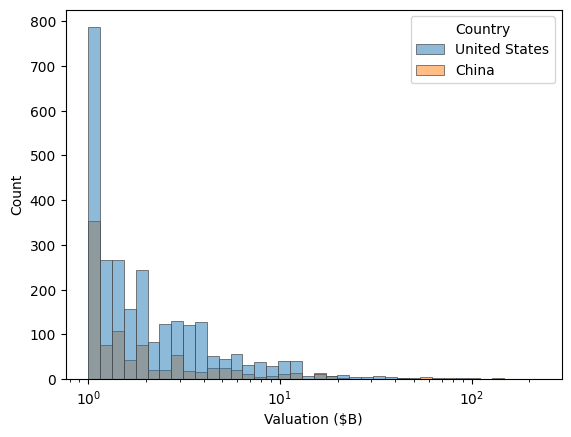

In [103]:
import seaborn as sns
# Dibujo
df_valuation = unicorns[unicorns['Country'].isin(['United States','China'])].reset_index()
sns.histplot(
    df_valuation.loc[df_valuation['Valuation ($B)']>0,:],
    x="Valuation ($B)", hue="Country",
    # multiple="stack",
    # palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

    Conclusión: Como Mann-Whitney nos da un p-vale de 5.457875322956404e-06 es menor que 0,05 se rechaza la hipotesis?. 

    ----------------------------

### 2. ¿Hay diferencia Significativa la valuación de las empresas unicornios en función de los paises a las que pertenecen?

# 4. Machine Learning

Análisis de factores de éxito:aprendizaje no supervisado

## Procesamiento de Dataset

In [104]:
ml = pd.read_csv('Unicorn+Companies/Unicorn_Companies.csv')

In [105]:
ml.head(3)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


In [106]:
reporte(ml)

El df esta formado por:  1074 filas y 10 columnas
Cantidad de valores duplicados:  0
Cantidad de valores nulos:  17


In [107]:
percentage_null(ml)

,City,Select Investors,Company,Valuation,Date Joined,Industry,Country,Continent,Year Founded,Funding
% nulos,1.49,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
ml = ml.drop(ml[ml['Funding']== 'Unknown'].index)

In [109]:
ml['Date Joined'] = pd.to_datetime(ml['Date Joined'])

In [110]:
ml['Year_Joined'] = ml['Date Joined'].dt.year

In [111]:
ml['Funding'] = ml['Funding'].str.replace('B', '000').str.replace('$', '').str.replace('M', '')
ml['Funding'] = pd.to_numeric(ml['Funding'])

In [112]:
ml['Valuation'] = ml['Valuation'].str.replace('B', '000').str.replace('$', '').str.replace('M', '')
ml['Valuation'] = pd.to_numeric(ml['Valuation'])

## Modelo de Regresión

### Transformación de variables categóricas

In [113]:
# Definimos las columnas que vamos a utilizar:

ml_reg = ml[['Valuation','Industry','Country','Year Founded','Funding']]

In [114]:
ml_reg

,Valuation,Industry,Country,Year Founded,Funding
0,180000,Artificial intelligence,China,2012,8000
1,100000,Other,United States,2002,7000
2,100000,E-commerce & direct-to-consumer,China,2008,2000
3,95000,Fintech,United States,2010,2000
4,46000,Fintech,Sweden,2005,4000
...,...,...,...,...,...
1069,1000,E-commerce & direct-to-consumer,China,2012,379
1070,1000,E-commerce & direct-to-consumer,China,2015,990
1071,1000,Consumer & retail,China,2018,80
1072,1000,Fintech,United Kingdom,2005,792


In [115]:
ml_reg.dtypes

Valuation        int64
Industry        object
Country         object
Year Founded     int64
Funding          int64
dtype: object

In [116]:
print(len(ml_reg['Industry'].unique()))
print(len(ml_reg['Country'].unique()))

16
46


In [117]:
# # Importamos la funcionalidad concreta de sklearn
# from sklearn.preprocessing import LabelEncoder

# # Transformamos esta columna
# encoder = LabelEncoder()
# encoded_data = encoder.fit_transform(ml_reg[['Industry','Country']])

In [118]:
# Unimos la información
# df_encoded = pd.concat([ml_reg, encoded_data], axis=1)

NameError: name 'encoded_data' is not defined

## Modelo de Regresión

# 5. Conclusiones

In [ ]:
# unicorns.to_csv('unicorns_powerbi.csv', header=True, index=False)

In [ ]:
unicorns.to_excel('unicorns.xlsx', header=True, index=False)